In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_set = pd.read_hdf("train_set0517.h5")
test_set = pd.read_hdf("test_set0517.h5")

In [3]:
train_set

,ID,YEAR,MONTH,DAY,TMAX,TMIN,TAVG,PRCP,MM/DD/YYYY,Station name,Altitude,latitude,longitude,City,Address,ID_Code,TMAX_Interval,TMIN_Interval,TAVG_Interval,PRCP_Interval
0,466880,2017,1,1,26.8,17.9,22.283333,0.000000,2017-01-01,板橋,9.7,121.442,24.9976,新北市,板橋區大觀路二段265巷62號,115083.0,16.0,14.0,15.0,0.0
1,466880,2017,1,2,25.1,16.8,20.829167,0.000000,2017-01-02,板橋,9.7,121.442,24.9976,新北市,板橋區大觀路二段265巷62號,115083.0,16.0,14.0,15.0,0.0
2,466880,2017,1,3,21.7,19.9,20.820833,0.110417,2017-01-03,板橋,9.7,121.442,24.9976,新北市,板橋區大觀路二段265巷62號,115083.0,15.0,14.0,15.0,0.0
3,466880,2017,1,4,26.5,19.0,22.858333,0.000000,2017-01-04,板橋,9.7,121.442,24.9976,新北市,板橋區大觀路二段265巷62號,115083.0,16.0,14.0,15.0,0.0
4,466880,2017,1,5,25.4,18.2,21.487500,0.000000,2017-01-05,板橋,9.7,121.442,24.9976,新北市,板橋區大觀路二段265巷62號,115083.0,16.0,14.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493412,ZI000067983,2018,9,1,25.8,10.5,18.700000,0.000000,2018-09-01,CHIPINGE,NaN,-20.200,32.6160,NaN,NaN,115081.0,16.0,13.0,14.0,0.0
4493413,ZI000067983,2018,9,29,28.1,16.6,18.300000,0.000000,2018-09-29,CHIPINGE,NaN,-20.200,32.6160,NaN,NaN,115081.0,16.0,14.0,14.0,0.0
4493414,ZI000067983,2018,10,20,27.0,15.2,21.900000,0.000000,2018-10-20,CHIPINGE,NaN,-20.200,32.6160,NaN,NaN,115081.0,16.0,14.0,15.0,0.0
4493415,ZI000067983,2018,11,12,24.9,11.9,21.000000,0.000000,2018-11-12,CHIPINGE,NaN,-20.200,32.6160,NaN,NaN,115081.0,15.0,13.0,15.0,0.0


In [3]:
x_train_data = train_set[['YEAR', 'MONTH', 'DAY', 'TMAX', 'TMIN', 'TAVG', 'PRCP']]
x_train_data = x_train_data.drop(x_train_data.index[-1])

In [4]:
from tensorflow.keras import backend as K

D:\python\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\python\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\python\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\python\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; 

In [5]:
x_train = K.cast_to_floatx(x_train_data.values.reshape((x_train_data.shape[0], 1, x_train_data.shape[1])))

In [7]:
x_train.shape

(4060570, 1, 7)

In [6]:
x_test_data = test_set[['YEAR', 'MONTH', 'DAY', 'TMAX', 'TMIN', 'TAVG', 'PRCP']]
x_test_data = x_test_data.drop(x_test_data.index[-1])

In [7]:
x_test = K.cast_to_floatx(x_test_data.values.reshape((x_test_data.shape[0], 1, x_test_data.shape[1])))

In [8]:
y_train_TMAX_data = train_set[['TMAX_Interval']].astype(int)
y_train_TMAX = y_train_TMAX_data.drop(y_train_TMAX_data.index[0])

In [9]:
y_test_TMAX_data = test_set[['TMAX_Interval']].astype(int)
y_test_TMAX = y_test_TMAX_data.drop(y_test_TMAX_data.index[0])

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU

In [11]:
TMAX_model_2 = Sequential()
TMAX_model_2.add(GRU(256, dropout = 0.25, recurrent_dropout = 0.25, input_shape = (
    x_train.shape[1], x_train.shape[2])))
TMAX_model_2.add(Dense(100, activation = 'relu'))
TMAX_model_2.add(Dense(50, activation = 'sigmoid'))
TMAX_model_2.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
TMAX_model_2.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 256)               202752    
_________________________________________________________________
dense (Dense)                (None, 100)               25700     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
Total params: 233,502
Trainable params: 233,502
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = TMAX_model_2.fit(x_train, y_train_TMAX, batch_size = 50, epochs = 20, validation_data = (x_test, y_test_TMAX))

Train on 4060570 samples, validate on 414830 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
4060570/4060570 [==============================] - 550s 135us/sample - loss: 0.4870 - acc: 0.8101 - val_loss: 0.5892 - val_acc: 0.7873
Epoch 2/20
4060570/4060570 [==============================] - 633s 156us/sample - loss: 0.4119 - acc: 0.8443 - val_loss: 0.5429 - val_acc: 0.8024
Epoch 3/20
4060570/4060570 [==============================] - 632s 156us/sample - loss: 0.3910 - acc: 0.8511 - val_loss: 0.5008 - val_acc: 0.8075
Epoch 4/20
4060570/4060570 [==============================] - 641s 158us/sample - loss: 0.3858 - acc: 0.8535 - val_loss: 0.5369 - val_acc: 0.8018
Epoch 5/20
4060570/4060570 [==============================] - 598s 147us/sample - loss: 0.3796 - acc: 0.8555 - val_loss: 0.5328 - val_acc: 0.7722
Epoch 6/20
4060570/4060570 [==============================] - 591s 145us/sample - loss: 0.3760 - acc: 0.8576 - val_loss: 0.

In [15]:
TMAX_model_2.save_weights('TMAX_model.h5')

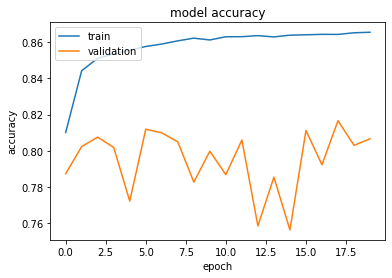

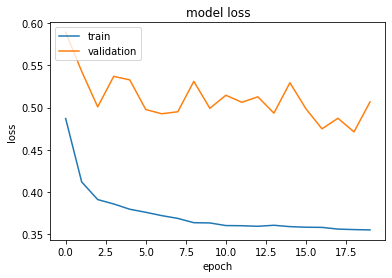

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
TMAX_model_2.load_weights("TMAX_model.h5")

In [13]:
predict_data = pd.read_csv('氣象局觀測資料.csv')
predict_data = predict_data[['YEAR', 'MONTH', 'DAY', 'TMAX', 'TMIN', 'TAVG', 'PRCP']]
predict_data = K.cast_to_floatx(predict_data.values.reshape(predict_data.shape[0], 1, predict_data.shape[1]))

In [15]:
TMAX_result = TMAX_model_2.predict_classes(predict_data)
TMAX_result

array([17, 17, 17, 16, 15, 16, 16, 16], dtype=int64)